In [1]:
setwd('d:/workspace/R_practice/data/R_data')

In [2]:
getwd()

[1] "d:/workspace/R_practice/data/R_data"

In [4]:
library(dplyr)
library(ggplot2)

In [5]:
df = read.csv('sales_data_1.csv')
head(df)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
1,200901,과즙음료,45,990,2611,4,126753,151,12
2,200902,과즙음료,45,1199,2689,9,113399,3014,8
3,200903,과즙음료,43,1102,2735,12,129162,1383,9
4,200904,과즙음료,42,1326,2807,19,126277,3564,8
5,200905,과즙음료,46,1672,2674,25,129584,9288,12
6,200906,과즙음료,48,1875,2777,27,123218,9998,8


In [6]:
summary(df)

       X                YM               CATEGORY     ITEM_CNT    
 Min.   :  1.00   Min.   :200901   과즙음료  :60   Min.   : 1.00  
 1st Qu.: 45.75   1st Qu.:201004   비타민음료:60   1st Qu.:14.00  
 Median : 90.50   Median :201107   차음료    :60   Median :43.00  
 Mean   : 90.50   Mean   :201107                   Mean   :39.57  
 3rd Qu.:135.25   3rd Qu.:201209                   3rd Qu.:57.00  
 Max.   :180.00   Max.   :201312                   Max.   :83.00  
      QTY             PRICE         MAXTEMP         SALEDAY      
 Min.   :  27.0   Min.   :1229   Min.   :-1.00   Min.   :113399  
 1st Qu.: 814.5   1st Qu.:1424   1st Qu.: 9.75   1st Qu.:143047  
 Median :1734.0   Median :1762   Median :19.50   Median :179564  
 Mean   :1685.7   Mean   :1915   Mean   :17.55   Mean   :181596  
 3rd Qu.:2387.2   3rd Qu.:2347   3rd Qu.:27.00   3rd Qu.:224721  
 Max.   :3992.0   Max.   :3251   Max.   :31.00   Max.   :245068  
    RAIN_DAY        HOLIDAY    
 Min.   :    0   Min.   : 8.0  
 1st Qu.: 2750   

In [7]:
product1 = df %>%
            filter(df$CATEGORY == '과즙음료')
product2 = df %>%
            filter(df$CATEGORY == '비타민음료')
product3 = df %>%
            filter(df$CATEGORY == '차음료')

product1 = product1[-c(1)]
# product2 = product2[-c(1,2,3)]
# product3 = product3[-c(1,2,3)]
head(product1)

YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
200901,과즙음료,45,990,2611,4,126753,151,12
200902,과즙음료,45,1199,2689,9,113399,3014,8
200903,과즙음료,43,1102,2735,12,129162,1383,9
200904,과즙음료,42,1326,2807,19,126277,3564,8
200905,과즙음료,46,1672,2674,25,129584,9288,12
200906,과즙음료,48,1875,2777,27,123218,9998,8


In [8]:
product1_train = product1 %>%
                    filter(!grepl('^2013', YM))
product1_test = product1 %>%
                    filter(grepl('^2013', YM))
product1_test

YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
201301,과즙음료,63,1627,2184,2,240416,2528,9
201302,과즙음료,65,1624,2337,5,217015,6667,9
201303,과즙음료,63,2103,2376,12,243648,4364,11
201304,과즙음료,60,2117,2445,15,237340,6727,8
201305,과즙음료,62,2606,2419,23,245068,17217,10
201306,과즙음료,56,2621,1962,28,236180,7360,11
201307,과즙음료,59,2336,1936,29,241687,41344,8
201308,과즙음료,61,2755,1957,31,240142,22284,10
201309,과즙음료,59,2992,1928,26,231662,13699,12
201310,과즙음료,64,2563,1898,21,239981,3011,10


In [9]:
head(product1_train)

YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
200901,과즙음료,45,990,2611,4,126753,151,12
200902,과즙음료,45,1199,2689,9,113399,3014,8
200903,과즙음료,43,1102,2735,12,129162,1383,9
200904,과즙음료,42,1326,2807,19,126277,3564,8
200905,과즙음료,46,1672,2674,25,129584,9288,12
200906,과즙음료,48,1875,2777,27,123218,9998,8


In [10]:
head(product1_train)

YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
200901,과즙음료,45,990,2611,4,126753,151,12
200902,과즙음료,45,1199,2689,9,113399,3014,8
200903,과즙음료,43,1102,2735,12,129162,1383,9
200904,과즙음료,42,1326,2807,19,126277,3564,8
200905,과즙음료,46,1672,2674,25,129584,9288,12
200906,과즙음료,48,1875,2777,27,123218,9998,8


In [11]:
train_model = lm(QTY ~ PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, data = product1_train)
summary(train_model)


Call:
lm(formula = QTY ~ PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, 
    data = product1_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-508.17 -163.98   15.64  150.88  677.77 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.062e+03  5.967e+02  -5.131 6.96e-06 ***
PRICE        7.290e-01  1.615e-01   4.513 5.09e-05 ***
MAXTEMP      5.333e+01  5.299e+00  10.063 9.30e-13 ***
SALEDAY      1.214e-02  1.125e-03  10.793 1.10e-13 ***
RAIN_DAY    -8.791e-03  5.441e-03  -1.616    0.114    
HOLIDAY      1.855e+01  3.164e+01   0.587    0.561    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 254.1 on 42 degrees of freedom
Multiple R-squared:  0.8685,	Adjusted R-squared:  0.8528 
F-statistic: 55.47 on 5 and 42 DF,  p-value: < 2.2e-16


In [15]:
library('car')

In [14]:
vif(train_model)

PRICE  MAXTEMP  SALEDAY RAIN_DAY  HOLIDAY 
1.143086 1.933619 1.170095 2.129141 1.020063

In [108]:
product1_train = product1_train[-c(29),]

In [112]:
product1_train = product1_train[-c(19, 41),]

In [116]:
product1_train = product1_train[-c(7, 37, 41),]

In [137]:
product1_train = product1_train[-41,]

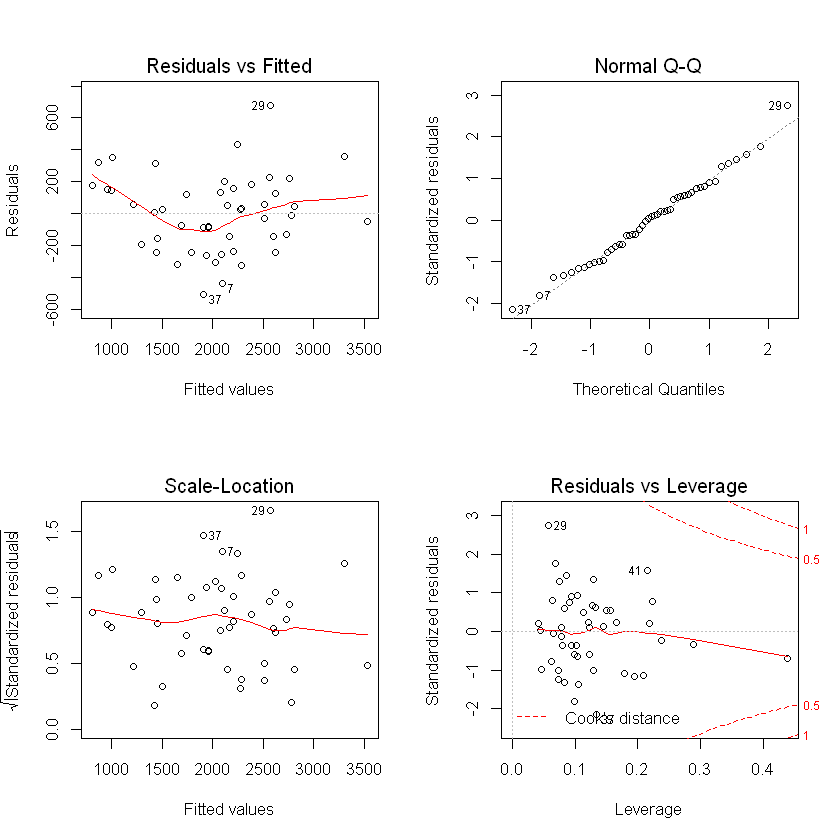

In [16]:
par(mfrow=c(2,2))
plot(train_model)

In [23]:
pred = data.frame(predict(train_model, product1_test, interval = 'predict'))
pre = as.data.frame(pred)
pre = cbind(pre, product1_test$QTY)

In [35]:
pre$acc[pre$'product1_test$QTY' >= pre$lwr & pre$'product1_test$QTY' <= pre$upr] = T
pre$acc[is.na(pre$acc)] = F

In [32]:
pre

fit,lwr,upr,product1_test$QTY,acc
1700.726,1122.031,2279.421,1627,TRUE
1651.769,1099.478,2204.060,1624,TRUE
2434.181,1872.158,2996.204,2103,TRUE
2491.450,1933.819,3049.080,2117,TRUE
2937.827,2389.358,3486.296,2606,TRUE
2868.611,2248.963,3488.259,2621,TRUE
2615.421,1993.986,3236.856,2336,TRUE
2923.296,2333.409,3513.183,2755,TRUE
2645.146,2031.546,3258.746,2992,TRUE
2514.482,1894.976,3133.989,2563,TRUE


In [33]:
dim(pre)[1]

[1] 12

In [34]:
sum(pre$acc == 'TRUE') / dim(pre)[1]

[1] 1

In [18]:
product1_test$QTY

[1] 1627 1624 2103 2117 2606 2621 2336 2755 2992 2563 1878 1770

In [38]:
mse = sum((product1_test$QTY - pre)^2)/12

In [39]:
mse

[1] 24957.61

In [139]:
shapiro.test(product1$QTY)
shapiro.test(product2$QTY)
shapiro.test(product3$QTY)


	Shapiro-Wilk normality test

data:  product1$QTY
W = 0.97503, p-value = 0.255



	Shapiro-Wilk normality test

data:  product2$QTY
W = 0.95973, p-value = 0.04565



	Shapiro-Wilk normality test

data:  product3$QTY
W = 0.96497, p-value = 0.0825


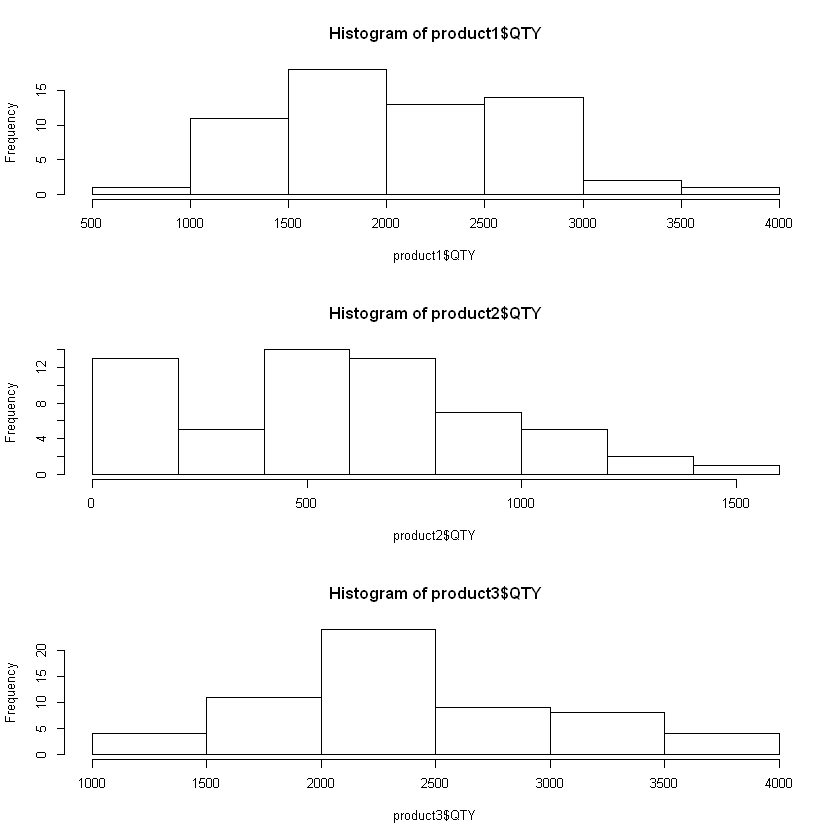

In [33]:
par(mfrow = c(3,1))
hist(product1$QTY)
hist(product2$QTY)
hist(product3$QTY)

In [34]:
cor(product1)
cor(product2)
cor(product3)

,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
ITEM_CNT,1.000000000,0.62112638,0.13251757,0.1037499329,0.54132421,0.21937484,0.0051196706
QTY,0.621126383,1.00000000,-0.09838038,0.7071806840,0.50189095,0.47567660,0.1367153610
PRICE,0.132517570,-0.09838038,1.00000000,-0.0843639944,-0.61948901,-0.21129511,-0.1157278564
MAXTEMP,0.103749933,0.70718068,-0.08436399,1.0000000000,0.02615313,0.67485293,-0.0007330759
SALEDAY,0.541324210,0.50189095,-0.61948901,0.0261531274,1.00000000,0.21351983,0.1509168646
RAIN_DAY,0.219374840,0.47567660,-0.21129511,0.6748529252,0.21351983,1.00000000,-0.0513513553
HOLIDAY,0.005119671,0.13671536,-0.11572786,-0.0007330759,0.15091686,-0.05135136,1.0000000000


,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
ITEM_CNT,1.00000000,0.7515737,0.85768871,0.0657196895,0.94217720,0.25896488,0.1358020307
QTY,0.75157371,1.0000000,0.72105041,0.3615501216,0.71192476,0.51181463,0.1201901927
PRICE,0.85768871,0.7210504,1.00000000,-0.0447921578,0.82446317,0.20432138,0.1188034038
MAXTEMP,0.06571969,0.3615501,-0.04479216,1.0000000000,0.02615313,0.67485293,-0.0007330759
SALEDAY,0.94217720,0.7119248,0.82446317,0.0261531274,1.00000000,0.21351983,0.1509168646
RAIN_DAY,0.25896488,0.5118146,0.20432138,0.6748529252,0.21351983,1.00000000,-0.0513513553
HOLIDAY,0.13580203,0.1201902,0.11880340,-0.0007330759,0.15091686,-0.05135136,1.0000000000


,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
ITEM_CNT,1.0000000,0.5704122,0.70276692,0.2392536817,0.70821785,0.29735950,0.1415037482
QTY,0.5704122,1.0000000,0.51443998,0.6762249882,0.66706580,0.53253647,0.1490117845
PRICE,0.7027669,0.5144400,1.00000000,-0.0209906744,0.79781578,0.11965126,0.1516141402
MAXTEMP,0.2392537,0.6762250,-0.02099067,1.0000000000,0.02615313,0.67485293,-0.0007330759
SALEDAY,0.7082179,0.6670658,0.79781578,0.0261531274,1.00000000,0.21351983,0.1509168646
RAIN_DAY,0.2973595,0.5325365,0.11965126,0.6748529252,0.21351983,1.00000000,-0.0513513553
HOLIDAY,0.1415037,0.1490118,0.15161414,-0.0007330759,0.15091686,-0.05135136,1.0000000000


In [35]:
out1 = lm(QTY~., data=product1)
out2 = lm(QTY~., data=product2)
out3 = lm(QTY~., data=product3)

In [36]:
summary(out1)


Call:
lm(formula = QTY ~ ., data = product1)

Residuals:
    Min      1Q  Median      3Q     Max 
-466.58 -128.84    1.77   68.64  616.56 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.427e+03  4.785e+02  -5.073 5.14e-06 ***
ITEM_CNT     2.021e+01  5.130e+00   3.940  0.00024 ***
PRICE        3.059e-01  1.484e-01   2.061  0.04424 *  
MAXTEMP      5.227e+01  4.015e+00  13.018  < 2e-16 ***
SALEDAY      6.651e-03  1.467e-03   4.534 3.34e-05 ***
RAIN_DAY    -1.192e-02  3.977e-03  -2.996  0.00415 ** 
HOLIDAY      4.158e+01  2.443e+01   1.702  0.09463 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 217.6 on 53 degrees of freedom
Multiple R-squared:  0.8929,	Adjusted R-squared:  0.8808 
F-statistic: 73.65 on 6 and 53 DF,  p-value: < 2.2e-16


In [37]:
both1 = step(out1, direction = 'both', trace = FALSE)
both2 = step(out2, direction = 'both', trace = FALSE)
both3 = step(out3, direction = 'both', trace = FALSE)

In [38]:
summary(both1)


Call:
lm(formula = QTY ~ ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + 
    HOLIDAY, data = product1)

Residuals:
    Min      1Q  Median      3Q     Max 
-466.58 -128.84    1.77   68.64  616.56 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.427e+03  4.785e+02  -5.073 5.14e-06 ***
ITEM_CNT     2.021e+01  5.130e+00   3.940  0.00024 ***
PRICE        3.059e-01  1.484e-01   2.061  0.04424 *  
MAXTEMP      5.227e+01  4.015e+00  13.018  < 2e-16 ***
SALEDAY      6.651e-03  1.467e-03   4.534 3.34e-05 ***
RAIN_DAY    -1.192e-02  3.977e-03  -2.996  0.00415 ** 
HOLIDAY      4.158e+01  2.443e+01   1.702  0.09463 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 217.6 on 53 degrees of freedom
Multiple R-squared:  0.8929,	Adjusted R-squared:  0.8808 
F-statistic: 73.65 on 6 and 53 DF,  p-value: < 2.2e-16


In [17]:
out1
out2
out3


Call:
lm(formula = QTY ~ ., data = product1)

Coefficients:
(Intercept)            X     ITEM_CNT        PRICE      MAXTEMP      SALEDAY  
 -2.195e+03    1.009e+01    1.707e+01    3.904e-01    5.248e+01    3.407e-03  
   RAIN_DAY      HOLIDAY  
 -1.154e-02    4.356e+01  



Call:
lm(formula = QTY ~ ., data = product2)

Coefficients:
(Intercept)            X     ITEM_CNT        PRICE      MAXTEMP      SALEDAY  
 -4.552e+02   -2.942e+01    5.209e+01    9.608e-01    9.737e+00    6.979e-03  
   RAIN_DAY      HOLIDAY  
  5.106e-03    1.763e+00  



Call:
lm(formula = QTY ~ ., data = product3)

Coefficients:
(Intercept)            X     ITEM_CNT        PRICE      MAXTEMP      SALEDAY  
 -3.393e+02    3.011e+00   -2.488e+01    4.453e-01    5.032e+01    9.376e-03  
   RAIN_DAY      HOLIDAY  
 -5.770e-03    2.705e+01  


In [18]:
summary(both1)


Call:
lm(formula = QTY ~ X + ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY + 
    HOLIDAY, data = product1)

Residuals:
    Min      1Q  Median      3Q     Max 
-444.85 -109.81    3.66   93.53  611.60 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.854e+03  4.082e+02  -4.543 3.24e-05 ***
X            1.847e+01  4.052e+00   4.559 3.07e-05 ***
ITEM_CNT     1.646e+01  5.792e+00   2.841  0.00637 ** 
PRICE        4.013e-01  1.655e-01   2.424  0.01877 *  
MAXTEMP      5.237e+01  4.012e+00  13.053  < 2e-16 ***
RAIN_DAY    -1.127e-02  3.977e-03  -2.834  0.00649 ** 
HOLIDAY      4.687e+01  2.426e+01   1.932  0.05869 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 217.3 on 53 degrees of freedom
Multiple R-squared:  0.8932,	Adjusted R-squared:  0.8811 
F-statistic:  73.9 on 6 and 53 DF,  p-value: < 2.2e-16


In [19]:
summary(both2)


Call:
lm(formula = QTY ~ X + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + 
    RAIN_DAY, data = product2)

Residuals:
    Min      1Q  Median      3Q     Max 
-319.72 -104.54  -37.62   95.11  472.52 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.366e+02  4.890e+02  -0.893  0.37604    
X           -2.959e+01  1.218e+01  -2.429  0.01856 *  
ITEM_CNT     5.228e+01  2.068e+01   2.528  0.01449 *  
PRICE        9.627e-01  2.681e-01   3.591  0.00072 ***
MAXTEMP      9.764e+00  3.706e+00   2.635  0.01102 *  
SALEDAY      7.023e-03  3.099e-03   2.266  0.02754 *  
RAIN_DAY     5.063e-03  3.635e-03   1.393  0.16942    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 195.7 on 53 degrees of freedom
Multiple R-squared:  0.7539,	Adjusted R-squared:  0.7261 
F-statistic: 27.06 on 6 and 53 DF,  p-value: 1.667e-14


In [20]:
summary(both3)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP + SALEDAY + RAIN_DAY, data = product3)

Residuals:
    Min      1Q  Median      3Q     Max 
-439.01 -153.19  -10.17  111.11  847.70 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 407.001584 435.740293   0.934    0.354    
ITEM_CNT    -19.839826  12.502835  -1.587    0.118    
MAXTEMP      50.176566   4.235722  11.846  < 2e-16 ***
SALEDAY       0.011402   0.001013  11.255 6.84e-16 ***
RAIN_DAY     -0.006452   0.004013  -1.608    0.114    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 224.4 on 55 degrees of freedom
Multiple R-squared:  0.8895,	Adjusted R-squared:  0.8814 
F-statistic: 110.7 on 4 and 55 DF,  p-value: < 2.2e-16


In [40]:
anova(both1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ITEM_CNT,1,9043861.0,9043860.97,190.930409,3.307852e-19
PRICE,1,779038.9,779038.89,16.446760,1.650024e-04
MAXTEMP,1,9340102.9,9340102.88,197.184551,1.685610e-19
SALEDAY,1,1151106.8,1151106.77,24.301710,8.501686e-06
RAIN_DAY,1,480183.7,480183.74,10.137449,2.432936e-03
HOLIDAY,1,137199.2,137199.21,2.896495,9.463209e-02
Residuals,53,2510467.7,47367.32,NA,NA


In [24]:
anova(both2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X,1,4247851.32,4247851.32,110.970147,1.320933e-14
ITEM_CNT,1,446413.15,446413.15,11.662021,1.230864e-03
PRICE,1,273159.30,273159.30,7.135967,1.001309e-02
MAXTEMP,1,938059.48,938059.48,24.505707,7.907744e-06
SALEDAY,1,235639.93,235639.93,6.155817,1.630553e-02
RAIN_DAY,1,74285.45,74285.45,1.940620,1.694169e-01
Residuals,53,2028798.97,38279.23,NA,NA


In [25]:
anova(both3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ITEM_CNT,1,8151493,8151493.0,161.921985,5.039152e-18
MAXTEMP,1,7741902,7741902.2,153.785837,1.451067e-17
SALEDAY,1,6260649,6260649.1,124.362092,9.735938e-16
RAIN_DAY,1,130132,130132.0,2.584954,1.136097e-01
Residuals,55,2768816,50342.1,NA,NA
